In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from model.model import SegModel
from model.pytorch_model import PytorchModel

import torch
from nets.U_net_simple import UNet
from nets.SegNet import SegNet 

from torch.utils.data import DataLoader 
from dataset.dataset import SegData
from dataset.pytorch_dataset import PytData

import numpy as np

/home/user/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


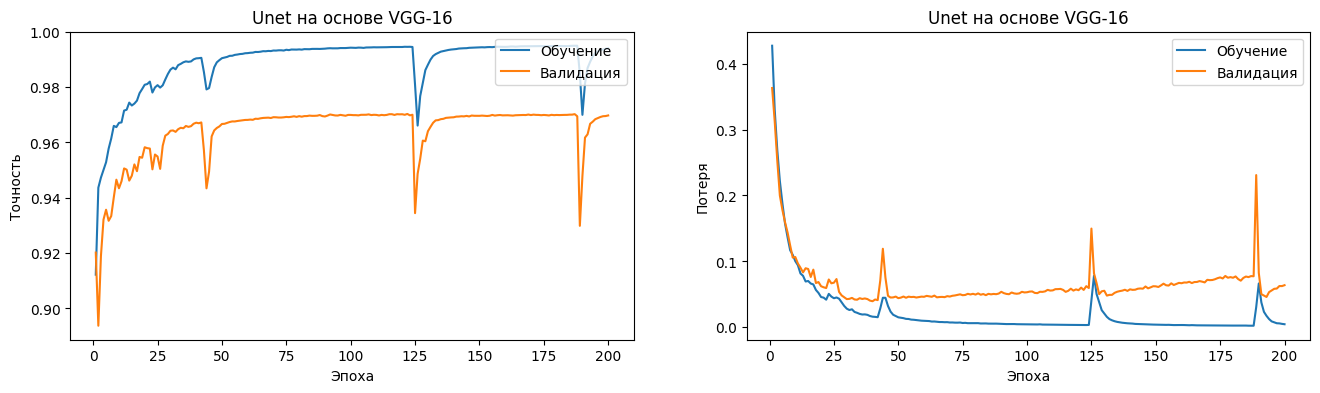

In [18]:
df = pd.read_csv('segmantation/logs/UNet_simple/simple_UNet/version_3/metrics.csv')
Accuracy_train_epoch = df.Accuracy_train_epoch.dropna()
Accuracy_valid_epoch = df.Accuracy_valid_epoch.dropna()
Loss_train_epoch = df.Loss_train_epoch.dropna()
Loss_valid_epoch = df.Loss_valid_epoch.dropna()

fig, axs = plt.subplots(1, 2, figsize=(16, 4))
axs[0].plot(list(range(1,201)), Accuracy_train_epoch, label='Обучение')
axs[0].plot(list(range(1,201)), Accuracy_valid_epoch, label='Валидация')
axs[0].set_xlabel('Эпоха')
axs[0].set_ylabel('Точность')
axs[0].set_title('Unet на основе VGG-16')
axs[0].legend(loc='upper right')
axs[1].plot(list(range(1,201)), Loss_train_epoch, label='Обучение')
axs[1].plot(list(range(1,201)), Loss_valid_epoch, label='Валидация')
axs[1].set_xlabel('Эпоха')
axs[1].set_ylabel('Потеря')
axs[1].set_title('Unet на основе VGG-16')
axs[1].legend(loc='upper right')

plt.show()

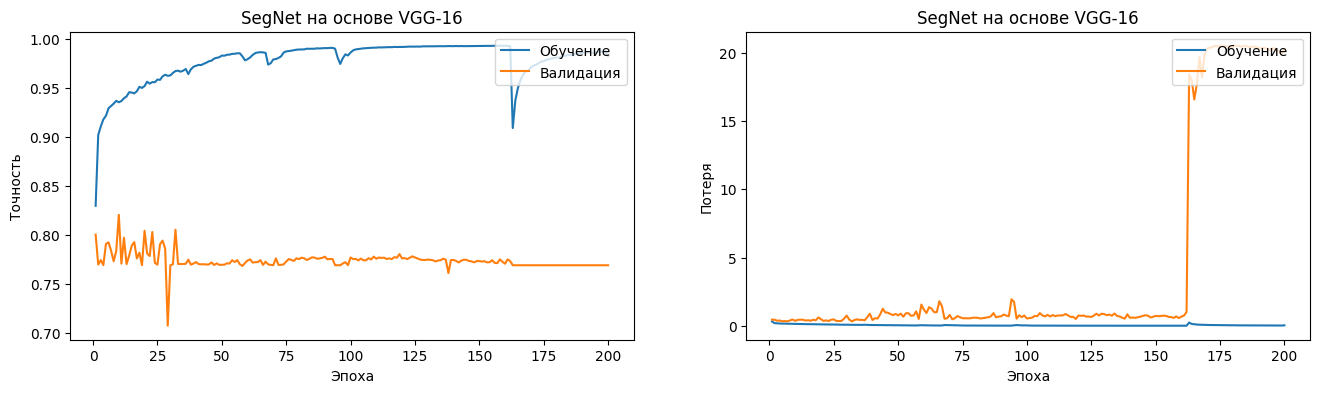

In [23]:
df = pd.read_csv('segmantation/logs/SegNet/simple_SegNet/version_2/metrics.csv')
Accuracy_train_epoch = df.Accuracy_train_epoch.dropna()[:200]
Accuracy_valid_epoch = df.Accuracy_valid_epoch.dropna()[:200]
Loss_train_epoch = df.Loss_train_epoch.dropna()[:200]
Loss_valid_epoch = df.Loss_valid_epoch.dropna()[:200]

fig, axs = plt.subplots(1, 2, figsize=(16, 4))
axs[0].plot(list(range(1,201)), Accuracy_train_epoch, label='Обучение')
axs[0].plot(list(range(1,201)), Accuracy_valid_epoch, label='Валидация')
axs[0].set_xlabel('Эпоха')
axs[0].set_ylabel('Точность')
axs[0].set_title('SegNet на основе VGG-16')
axs[0].legend(loc='upper right')
axs[1].plot(list(range(1,201)), Loss_train_epoch, label='Обучение')
axs[1].plot(list(range(1,201)), Loss_valid_epoch, label='Валидация')
axs[1].set_xlabel('Эпоха')
axs[1].set_ylabel('Потеря')
axs[1].set_title('SegNet на основе VGG-16')
axs[1].legend(loc='upper right')

plt.show()

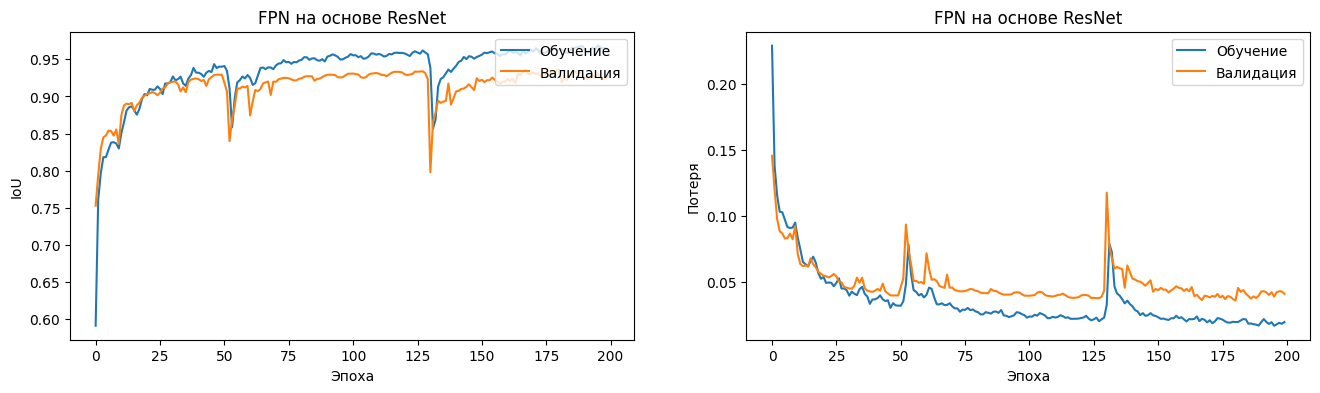

In [24]:
df = pd.read_csv('logs/FPN/ResNet/version_4/metrics.csv')
Accuracy_train_epoch = df.train_dataset_iou.dropna()[:200]
Accuracy_valid_epoch = df.valid_dataset_iou.dropna()[:200]
Loss_train_epoch = df.Loss_train_epoch.dropna()[:200]
Loss_valid_epoch = df.Loss_valid_epoch.dropna()[:200]

fig, axs = plt.subplots(1, 2, figsize=(16, 4))
axs[0].plot(list(range(len(Accuracy_train_epoch))), Accuracy_train_epoch, label='Обучение')
axs[0].plot(list(range(len(Accuracy_train_epoch))), Accuracy_valid_epoch, label='Валидация')
axs[0].set_xlabel('Эпоха')
axs[0].set_ylabel('IoU')
axs[0].set_title('FPN на основе ResNet')
axs[0].legend(loc='upper right')
axs[1].plot(list(range(len(Loss_train_epoch))), Loss_train_epoch, label='Обучение')
axs[1].plot(list(range(len(Loss_train_epoch))), Loss_valid_epoch, label='Валидация')
axs[1].set_xlabel('Эпоха')
axs[1].set_ylabel('Потеря')
axs[1].set_title('FPN на основе ResNet')
axs[1].legend(loc='upper right')

plt.show()

In [14]:
val_ds = SegData(image_path = '../seg_dataset/images', mask_path = '../seg_dataset/maps_roads',
                 train_ratio = 0.9, size = 224,  mode = 'test', seed = 1)
batch = next(iter(val_ds))
img, mask = batch
batched_img = np.expand_dims(np.transpose(img, (2, 0, 1)), axis=0)
batched_mask = np.expand_dims(mask, axis=0)

In [41]:
net = UNet() #
model = SegModel(image_path = '../seg_dataset/images', mask_path = '../seg_dataset/maps_roads',
                 train_ratio = 0.9, num_workers = 8, batch_size = 16, img_size = 224, net = net)
checkpoint = torch.load('logs/UNet_simple/simple_UNet/version_3/checkpoints/epoch=199-step=9200.ckpt')
model.load_state_dict(checkpoint['state_dict'])
pred = model.net(torch.tensor(batched_img, dtype = torch.float32))
pred[pred > 0.5] = 255
pred[pred <= 0.5] = 0

/home/user/.local/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/user/.local/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/tmp/ipykernel_3537346/3385720084.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-model

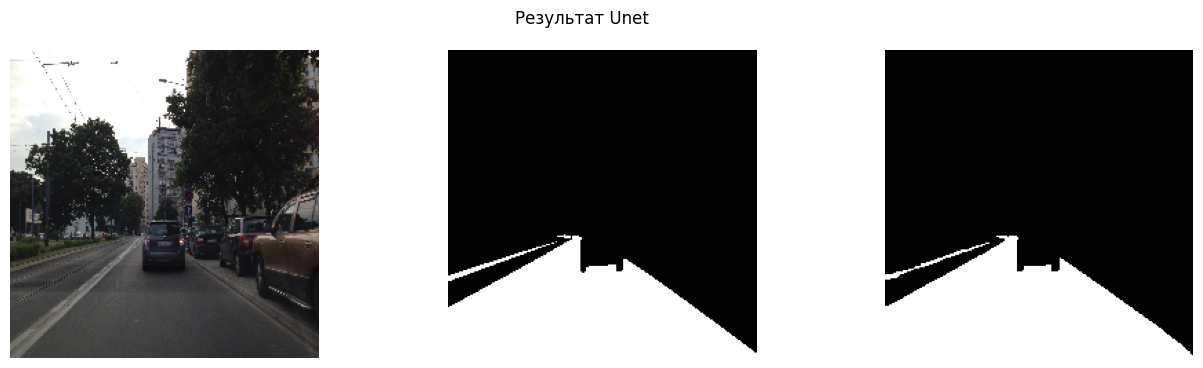

In [43]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
axs[0].imshow(img, cmap='binary')
axs[0].axis('off')
axs[1].imshow(batched_mask[0][0], cmap='gray')
axs[1].axis('off') 

axs[2].imshow(pred.squeeze(0).detach().numpy(), cmap='gray')
axs[2].axis('off')
fig.suptitle('Результат Unet')
plt.show()

In [15]:
net = SegNet(1) #
model = SegModel(image_path = '../seg_dataset/images', mask_path = '../seg_dataset/maps_roads',
                 train_ratio = 0.9, num_workers = 8, batch_size = 16, img_size = 224, net = net)
checkpoint = torch.load('logs/UNet_simple/checkpoints/check-epoch=00-Loss_valid=1.17-Accuracy_valid=0.19.ckpt')
model.load_state_dict(checkpoint['state_dict'])
pred = model.net(torch.tensor(batched_img, dtype = torch.float32))
pred[pred > 0.5] = 255
pred[pred <= 0.5] = 0
 

/tmp/ipykernel_3537346/4081970300.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('logs/UNet_simple/checkpoints/check-epoch=00-Loss_valid=1.17-Ac

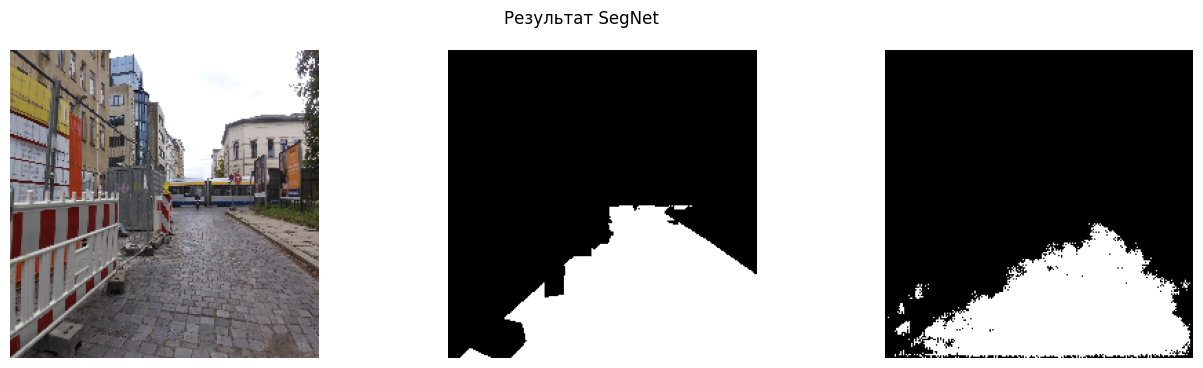

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
axs[0].imshow(img, cmap='binary')
axs[0].axis('off')
axs[1].imshow(batched_mask[0], cmap='gray')
axs[1].axis('off') 

axs[2].imshow(pred.squeeze(0).detach().numpy(), cmap='gray')
axs[2].axis('off')
fig.suptitle('Результат SegNet')
plt.show()

In [44]:
val_ds = PytData(image_path = '../seg_dataset/images', mask_path = '../seg_dataset/maps_roads',
                 train_ratio = 0.9, size = 224,  mode = 'test', seed = 1)
batch = next(iter(val_ds))
img, mask = batch
batched_img = np.expand_dims(np.transpose(img, (2, 0, 1)), axis=0)
batched_mask = np.expand_dims(mask, axis=0) 

model = PytorchModel(architecture = 'FPN', encoder_name = 'resnet34', in_channels = 3, out_classes = 1,
                     image_path = '../seg_dataset/images', mask_path = '../seg_dataset/maps_roads',
                    train_ratio = 0.9, num_workers = 8, batch_size = 16, img_size = 224, max_epoch = None)
checkpoint = torch.load('logs/FPN/ResNet/version_4/checkpoints/epoch=199-step=9200.ckpt')
model.load_state_dict(checkpoint['state_dict'])
pred = model(torch.tensor(batched_img, dtype = torch.float32))
pred[pred > 0.5] = 255
pred[pred <= 0.5] = 0

/tmp/ipykernel_3537346/52428519.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('logs/FPN/ResNet/version_4/checkpoints/epoch=199-step=9200.ckpt'

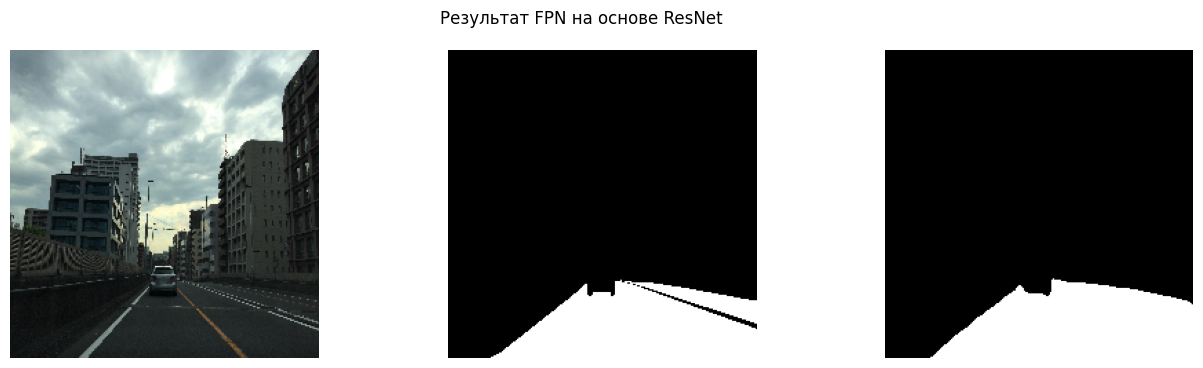

In [45]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
axs[0].imshow(img, cmap='binary')
axs[0].axis('off')
axs[1].imshow(batched_mask[0][0], cmap='gray')
axs[1].axis('off') 

axs[2].imshow(pred.squeeze(0).squeeze(0).detach().numpy(), cmap='gray')
axs[2].axis('off')
fig.suptitle('Результат FPN на основе ResNet')
plt.show()